In [1]:
#### ASSIGNMENT 03 - AIDI2000 ####
#### PART 04 - CONVOLUCIONAL NEURAL NETWORK - CNN ####

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

In [2]:
# Load Fashion MNIST dataset
print("Loading Fashion MNIST dataset...")
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Loading Fashion MNIST dataset...


In [3]:
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Preprocess the data
# Reshape for CNN (add channel dimension)
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [5]:
# Normalize pixel values to be between 0 and 1
X_train_cnn /= 255.0
X_test_cnn /= 255.0

In [6]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

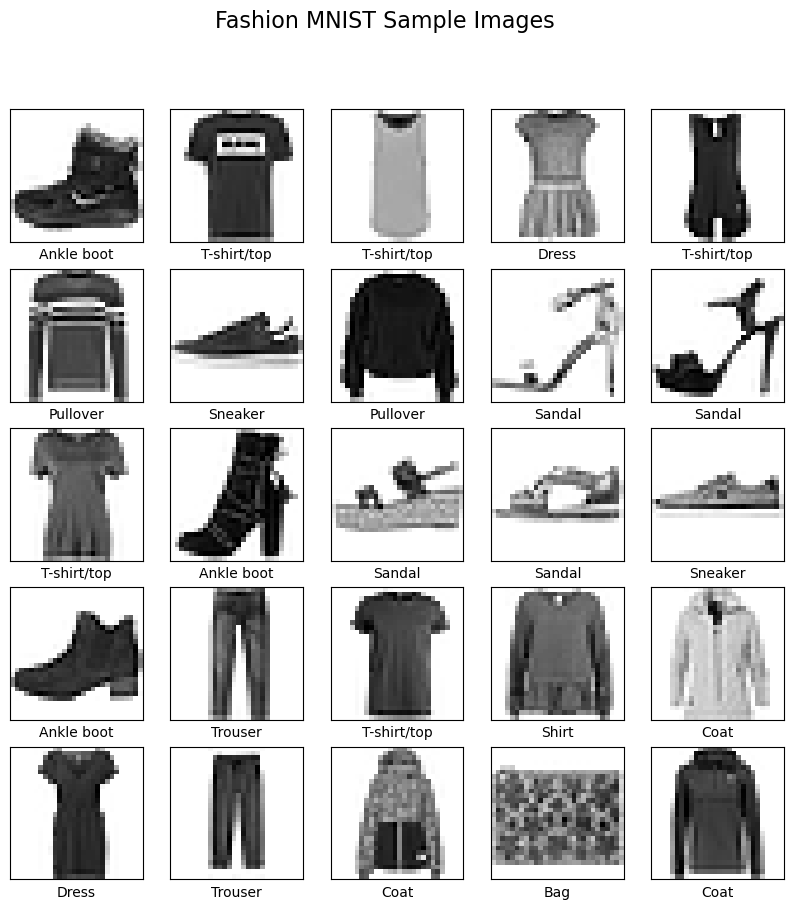

In [7]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle('Fashion MNIST Sample Images', fontsize=16)
plt.show()

In [8]:
print("\nBuilding CNN model...")
model = Sequential([
    # First Conv2D + MaxPooling block
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
            input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second Conv2D + MaxPooling block
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
            kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Third Conv2D + MaxPooling block
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
            kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten + Dense layers
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Building CNN model...


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
print("\nCNN Model Summary:")
model.summary()


CNN Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
print("\nTraining CNN model...")
cnn_history = model.fit(
    X_train_cnn, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Training CNN model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.6516 - loss: 1.2178 - val_accuracy: 0.8550 - val_loss: 0.5818
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8464 - loss: 0.6134 - val_accuracy: 0.8750 - val_loss: 0.4920
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8653 - loss: 0.5278 - val_accuracy: 0.8843 - val_loss: 0.4504
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8772 - loss: 0.4826 - val_accuracy: 0.8938 - val_loss: 0.4165
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8844 - loss: 0.4528 - val_accuracy: 0.8807 - val_loss: 0.4361
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8886 - loss: 0.4427 - val_accuracy: 0.8912 - val_loss: 0.4191
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8895 - loss: 0.4344 - val_accuracy: 0.8920 - val_loss: 0.3987
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0

In [11]:
print("\n--- CNN Model Evaluation ---")
cnn_test_loss, cnn_test_acc = model.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"Test accuracy: {cnn_test_acc:.4f}")
print(f"Test loss: {cnn_test_loss:.4f}")


--- CNN Model Evaluation ---
Test accuracy: 0.9015
Test loss: 0.3873


In [12]:
# Generate predictions and classification reports
cnn_predictions = model.predict(X_test_cnn)
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [13]:
# Print classification reports
print("\nCNN Classification Report:")
print(classification_report(y_test, cnn_pred_classes, target_names=class_names))


CNN Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.81      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.84      0.87      0.86      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.82      0.87      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.73      0.72      0.72      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



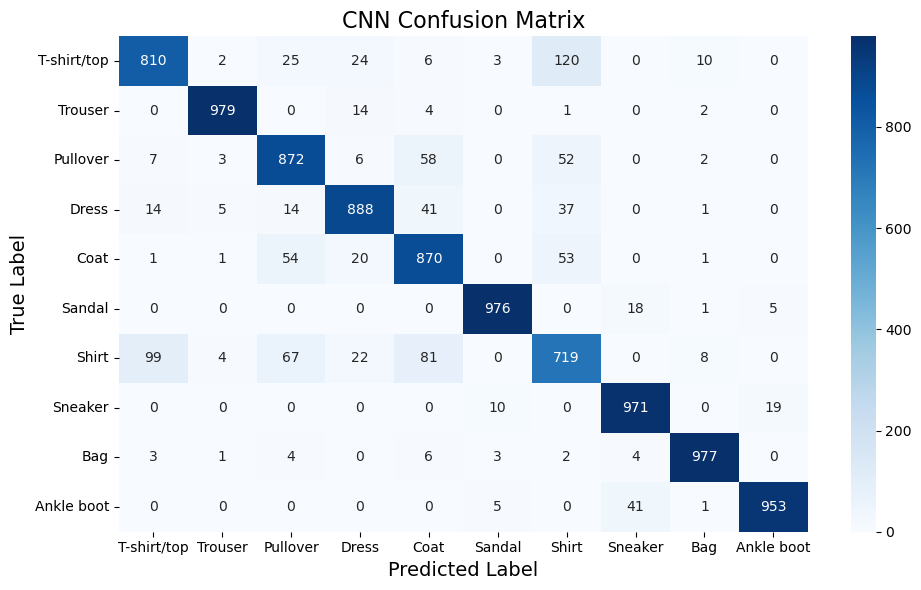

In [14]:
# Plot confusion matrices
plt.figure(figsize=(10, 6))

cnn_cm = confusion_matrix(y_test, cnn_pred_classes)
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('CNN Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

plt.tight_layout()
plt.show()

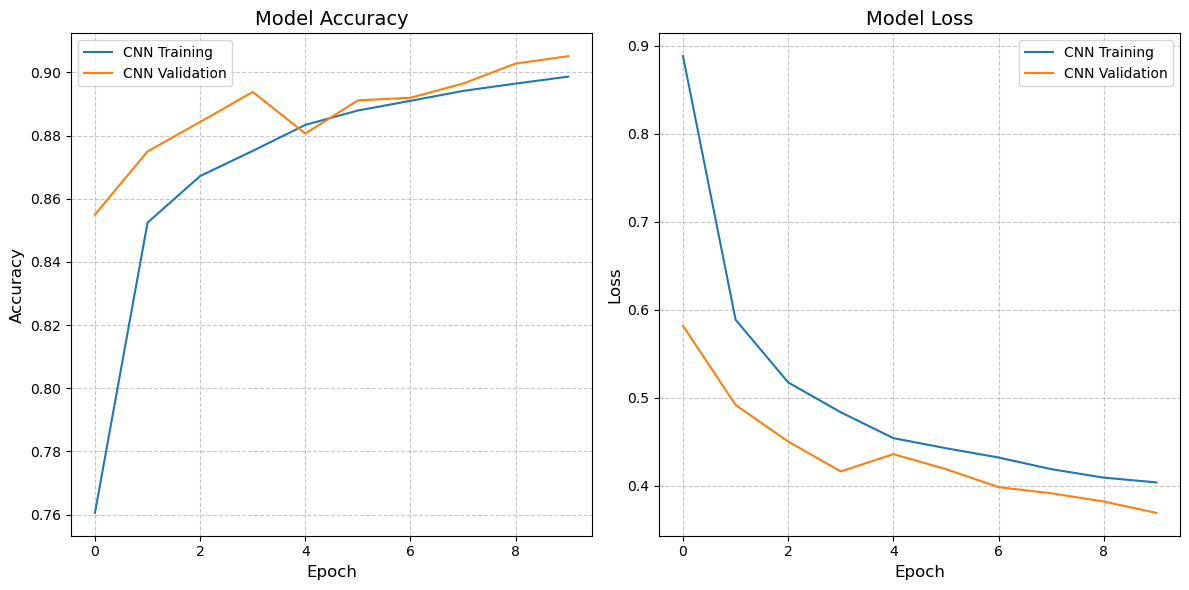

In [25]:
# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN Training')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [22]:
# Display some example predictions
def plot_image_predictions(images, true_labels, cnn_preds, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        
        cnn_pred = np.argmax(cnn_preds[i])
        cnn_correct = (cnn_pred == true_labels[i])
        
        plt.title(f"True: {class_names[true_labels[i]]}\n"
                 f"CNN: {class_names[cnn_pred]} ({'ok' if cnn_correct else 'X'})")
        
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
    
    plt.tight_layout()
    plt.show()

In [23]:
# Select a few test examples
test_indices = np.random.choice(len(X_test), 9, replace=False)
test_images = X_test[test_indices]
test_labels = y_test[test_indices]
cnn_test_preds = cnn_predictions[test_indices]

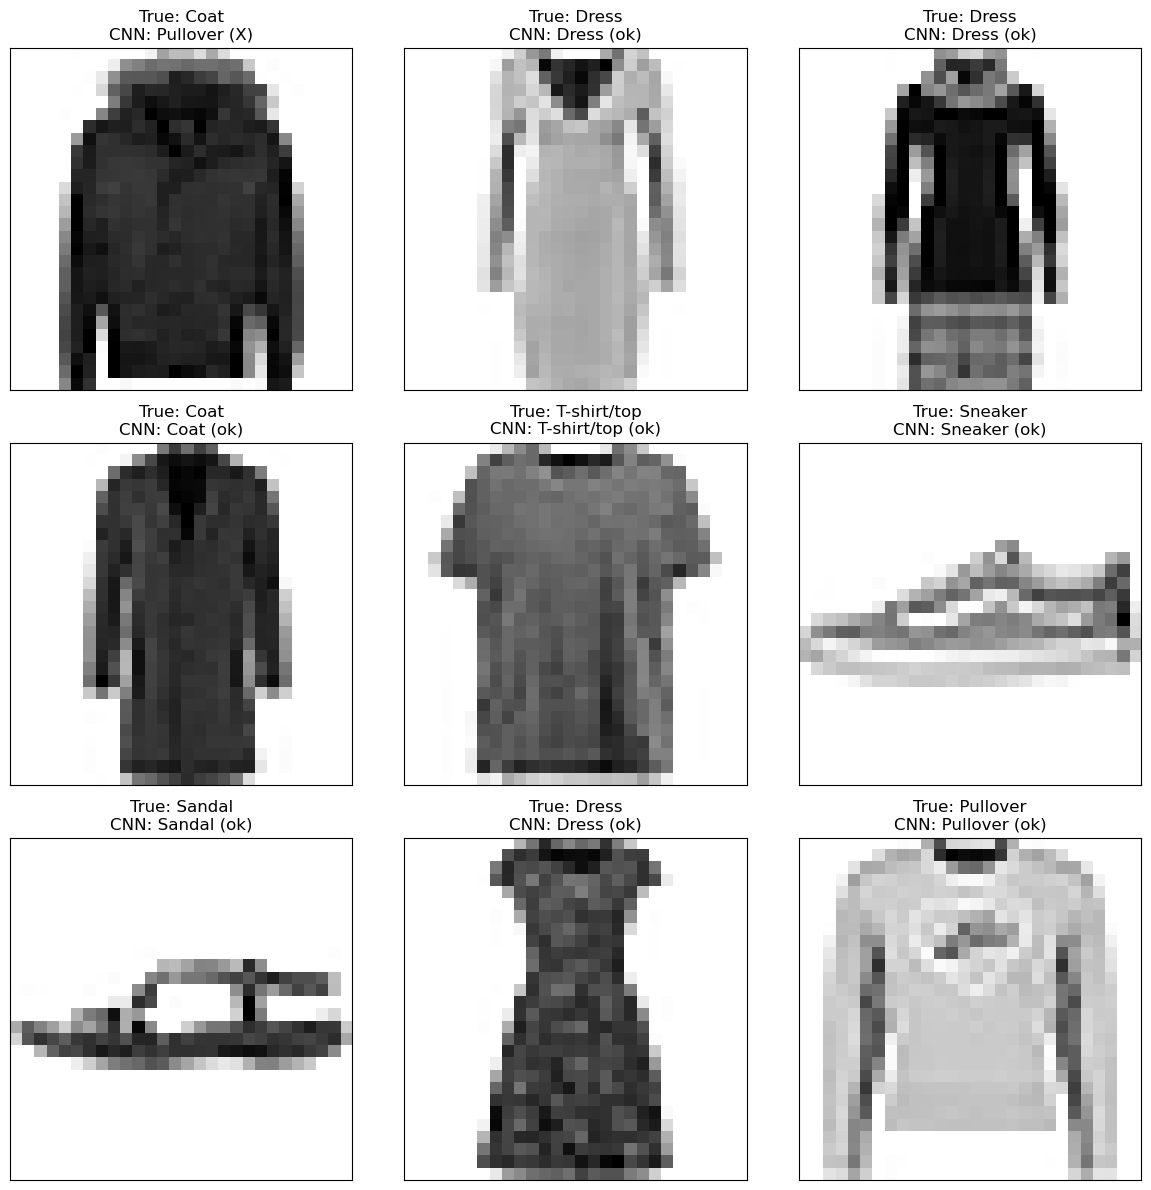

In [24]:
# Plot the example predictions
plot_image_predictions(test_images, test_labels, cnn_test_preds, class_names)